# Using the Main Deeplay Methods

Deeplay extends PyTorch and Lightning with some useful methods. Here, you'll see some of the most commonly employed ones.

In [1]:
import deeplay as dl

net = dl.models.SmallMLP(in_features=10, out_features=1)
model = dl.Regressor(net)

## `Application.fit()`

The `Application.fit()` method is a short-hand for the Lightning `trainer.fit()` method. its main advantage is that it doesn't require you to create the `DataLoader` objects. Instead, you can pass it NumPy arrays, torch tensors or datasets.

### `Application.fit` with NumPy Arrays

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


(<Figure size 1500x500 with 1 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>]], dtype=object))

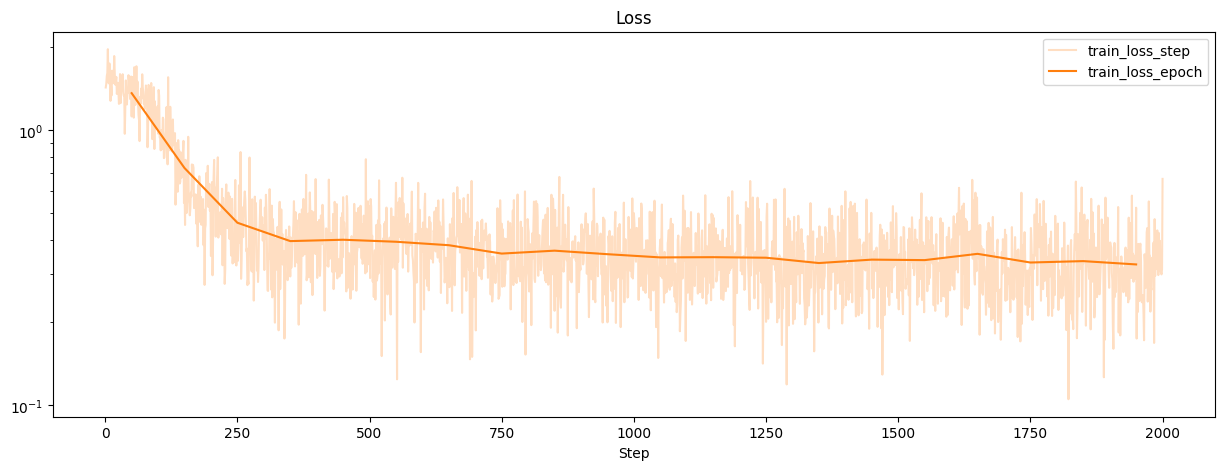

In [2]:
import numpy

x_numpy = numpy.random.randn(1000, 10)  # Input data.
y_numpy = x_numpy.max(axis=1, keepdims=True)  # Target data.

numpy_model = model.create()  # Create new model instance.

h = numpy_model.fit(
    (x_numpy, y_numpy), 
    max_epochs=20, 
    batch_size=10,
)

h.plot()  # Plot history.

### `Application.fit()` with PyTorch Tensors

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

(<Figure size 1500x500 with 1 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>]], dtype=object))

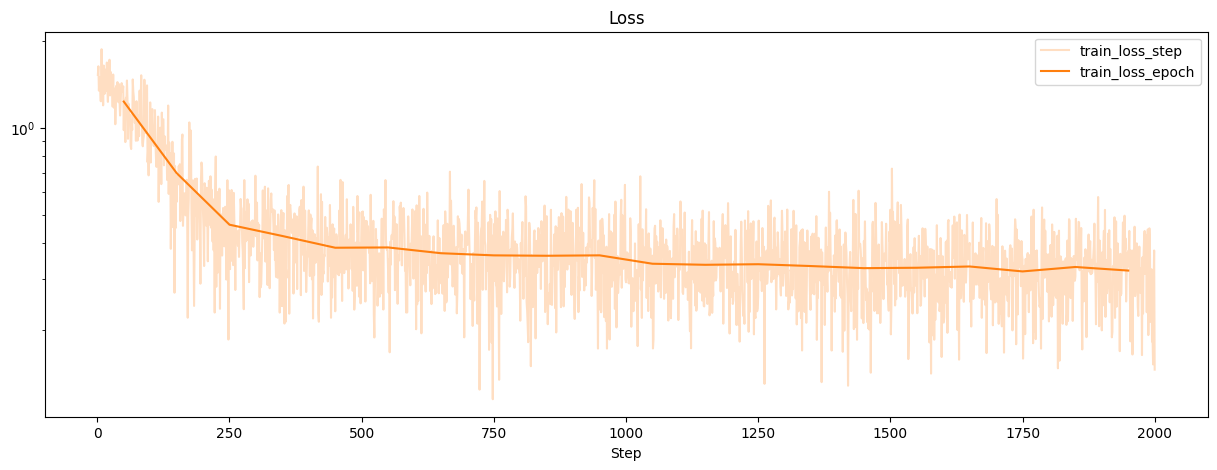

In [3]:
import torch

x_torch = torch.from_numpy(x_numpy).float()
y_torch = torch.from_numpy(y_numpy).float()

torch_model = model.create()

h = torch_model.fit(
    (x_torch, y_torch),
    max_epochs=20, 
    batch_size=10,
)

h.plot()

### `Application.fit()` with Datasets

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

(<Figure size 1500x500 with 1 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>]], dtype=object))

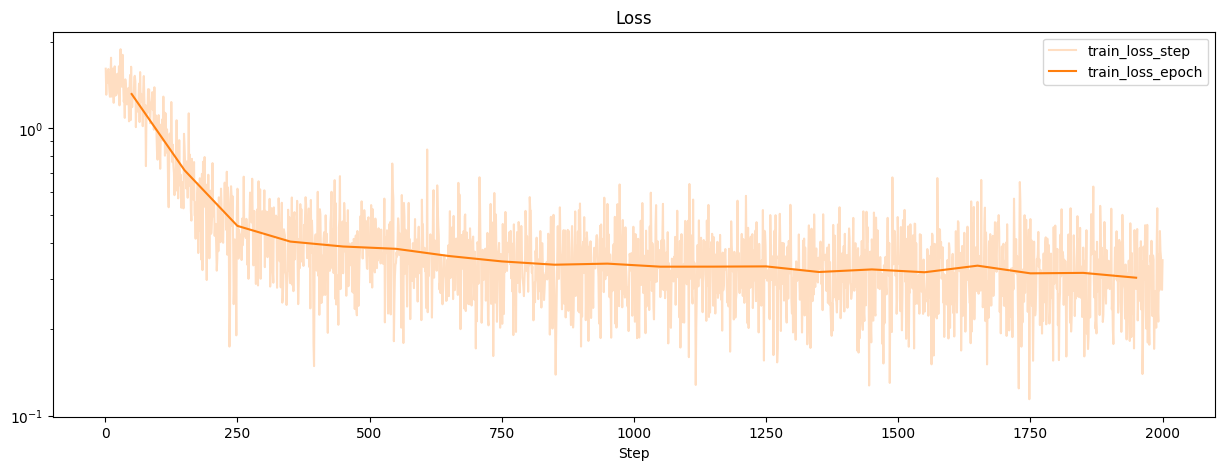

In [4]:
dataset = torch.utils.data.TensorDataset(x_torch, y_torch)

dataset_model = model.create()

h = dataset_model.fit(
    dataset, 
    max_epochs=20, 
    batch_size=10,
)

h.plot()

### `Application.fit()` with Validation Data

You can also pass validation data to the `Application.fit()` method. This data doesn't have to be in the same format as the training data. Note that the plot now also shows the validation loss overlaid.

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/py
torch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to
improve performance.

(<Figure size 1500x500 with 1 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>]], dtype=object))

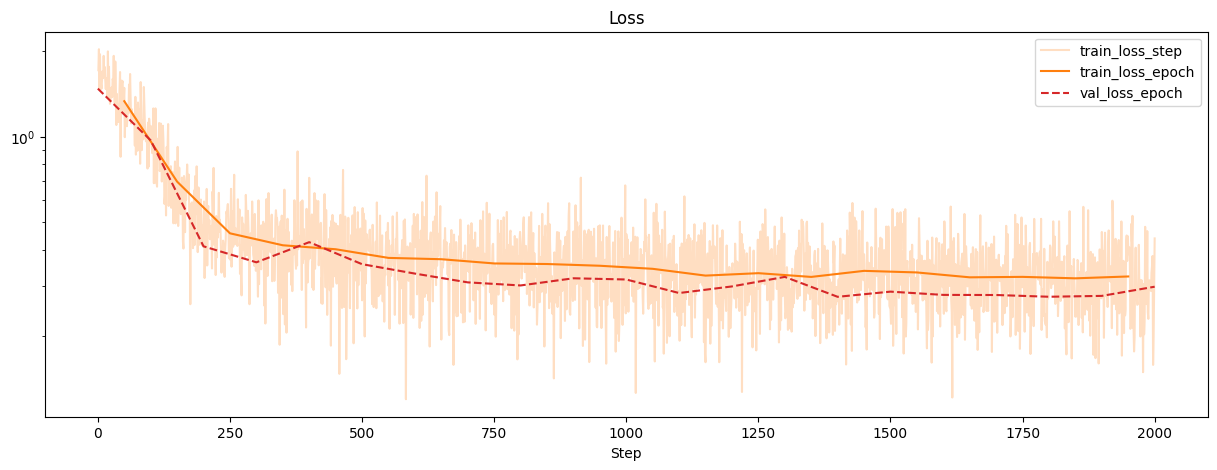

In [5]:
x_numpy_val = numpy.random.randn(100, 10)
y_numpy_val = x_numpy_val.max(axis=1, keepdims=True)

validated_model = model.create()

h = validated_model.fit(
    dataset, 
    max_epochs=20, 
    batch_size=10, 
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50,
)

h.plot()

### `Application.fit()` with DeepTrack Pipelines

You can also pass DeepTrack pipelines to the `Application.fit()` method. For example, this is useful when you want to generate data on-the-fly.

**Note:** Since the data are generated on the fly, you need to indicate the number of batches per epoch of training (`steps_per_epoch`) and whether to generate new data for each batch (`replace`, which can also be a number between 0 and 1, indicating the fraction of data to replace).

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/py
torch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to
improve performance.

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/py
torch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to
improve performance.

(<Figure size 1500x500 with 1 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>]], dtype=object))

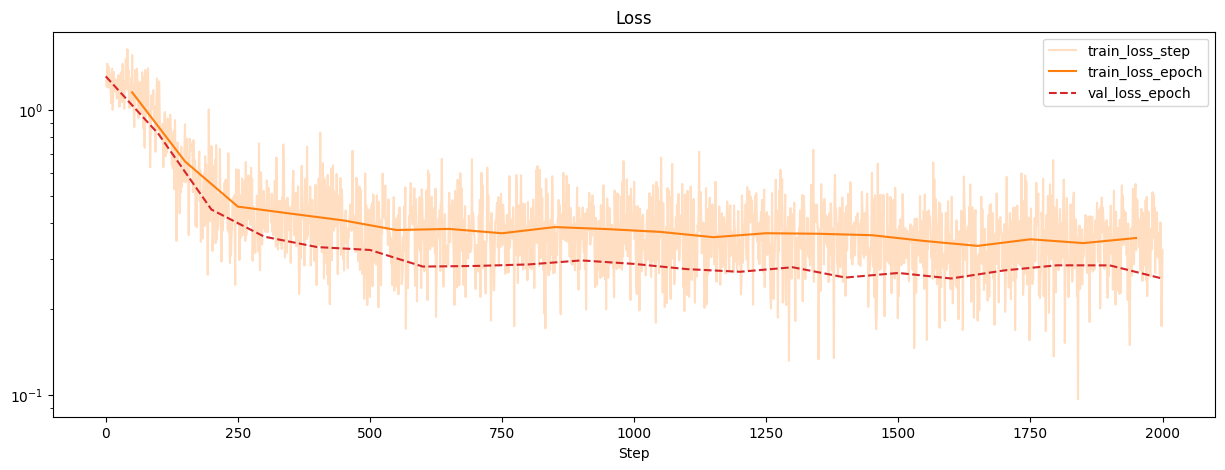

In [6]:
import deeptrack as dt

x_dt = dt.Value(lambda: numpy.random.randn(10))  # Input pipeline.
y_dt = x_dt >> dt.Max(axis=0, keepdims=True)  # Target pipeline.

pipeline = x_dt & y_dt  # Combine pipelines.

pipeline_model = model.create()

h = pipeline_model.fit(
    pipeline, 
    max_epochs=20, 
    batch_size=10, 
    steps_per_epoch=100,
    replace=True,
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50,
)
                       
h.plot()


## `Application.test()`

The `Application.test()` method is a short-hand for calling the Lightning `trainer.test()` method. It doesn't require you to create the `DataLoader` objects. It can also take specific TorchMetrics objects to calculate metrics on the test set.

In [7]:
import torchmetrics

mse_metric = torchmetrics.regression.MeanSquaredError()

numpy_res = numpy_model.test(
    (x_numpy_val, y_numpy_val), 
    mse_metric,
)
print(f"Pipeline test result (dataset_model): {numpy_res}\n")

torch_res = torch_model.test(
    dataset, 
    mse_metric,
)
print(f"Pipeline test result (torch_model): {torch_res}\n")

dataset_res = dataset_model.test(
    dataset, 
    mse_metric,
)
print(f"Pipeline test result (dataset_model): {dataset_res}\n")

pipeline_res = pipeline_model.test(
    (x_numpy_val, y_numpy_val), 
    mse_metric,
)
print(f"Pipeline test result (pipeline_model): {pipeline_res}\n")

100%|██████████| 4/4 [00:00<00:00, 12.34it/s]


Pipeline test result (dataset_model): {'MeanSquaredError': tensor(0.1431, device='mps:0')}



100%|██████████| 32/32 [00:00<00:00, 175.91it/s]


Pipeline test result (torch_model): {'MeanSquaredError': tensor(0.1013, device='mps:0')}



100%|██████████| 32/32 [00:00<00:00, 797.19it/s]


Pipeline test result (dataset_model): {'MeanSquaredError': tensor(0.0941, device='mps:0')}



100%|██████████| 4/4 [00:00<00:00, 718.63it/s]

Pipeline test result (pipeline_model): {'MeanSquaredError': tensor(0.1227, device='mps:0')}



### `Application.test()` with a List of Metrics

You can also provide a list of metrics to calculate on the test set. The name of each metric is used as the key in the returned dictionary.

In [8]:
var_metric = torchmetrics.regression.ExplainedVariance()

pipeline_res = pipeline_model.test(
    (x_numpy_val, y_numpy_val), 
    [mse_metric, var_metric],
)
print("Pipeline test result:", pipeline_res)

100%|██████████| 4/4 [00:00<00:00, 152.00it/s]

Pipeline test result: {'MeanSquaredError': tensor(0.1227, device='mps:0'), 'ExplainedVariance': tensor(0.6671, device='mps:0')}


### `Application.test()` with Named Metrics

You can also specify the desired output name of the metrics. You can do this either passing the metrics as a dictionary ...

In [9]:
pipeline_res_dict = pipeline_model.test(
    (x_numpy_val, y_numpy_val), 
    {"MSE": mse_metric, "VAR": var_metric},
)
print("Pipeline dict test result:  ", pipeline_res_dict)

100%|██████████| 4/4 [00:00<00:00, 384.32it/s]


Pipeline dict test result:   {'MSE': tensor(0.1227, device='mps:0'), 'VAR': tensor(0.6671, device='mps:0')}


... or as tuples.

In [10]:
pipeline_res_tuples = pipeline_model.test(
    (x_numpy_val, y_numpy_val), 
    [("mse", mse_metric), ("var", var_metric)], 
)
print("Pipeline tuples test result:", pipeline_res_tuples)

100%|██████████| 4/4 [00:00<00:00, 222.72it/s]

Pipeline tuples test result: {'mse': tensor(0.1227, device='mps:0'), 'var': tensor(0.6671, device='mps:0')}


## `DeeplayModule.predict()`

The `DeeplayModule.predict()` method is a convienient way to get predictions from the model on a large dataset. It does the batching, moving the data to the correct device and returning the predictions in a single call to the model without gradients.

Text(0, 0.5, 'Predicted value')

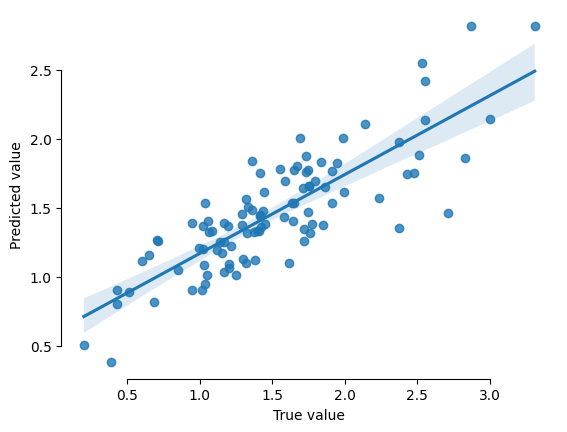

In [19]:
import seaborn as sns

predicted_y = pipeline_model.predict(
    x_numpy_val, 
    batch_size=10,
).cpu().numpy()

ax = sns.regplot(x=y_numpy_val, y=predicted_y)
sns.despine(trim=True)
ax.set_xlabel("True value")
ax.set_ylabel("Predicted value")

## Working with trainers

For more control over the training, you can use trainers just like you would in PyTorch Lightning. The `Trainer` object is available in the `deeplay` namespace. If you want to use trainers, you'll need to use data loaders. For convenience, the history of the training is additionally stored in the `trainer` object.

In [ ]:
train_dataloader = dl.DataLoader(dataset, batch_size=10, shuffle=True)

trainer_model = model.create()
trainer = dl.Trainer(max_epochs=20)
trainer.fit(trainer_model, train_dataloader)

trainer.history.plot()